In [13]:
import sys
sys.path.append('RenderMan/Builds/LinuxMakefile/build')
import librenderman as rm
import RenderPatches as rp

import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
def play_audio(audio, rate=44100):
    ipd.display(ipd.Audio(audio, rate=rate))
    
import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
from scipy.fft import fftshift


ImportError: No module named fft

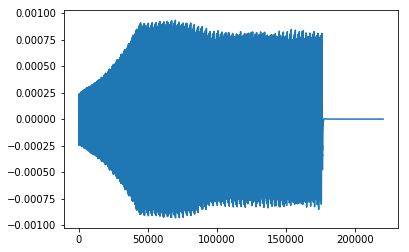

[ 0.          0.19984411  0.39968823 ... -0.59953234 -0.39968823
 -0.19984411]


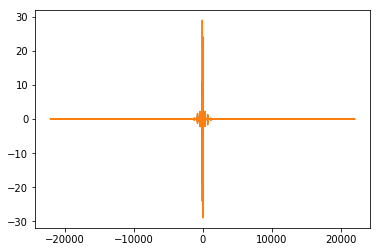

In [12]:
engine = rp.create_engine("Dexed.so")
audio,_ = rp.render_random(engine, True)

play_audio(audio, rate=44100)
plt.plot(audio)
plt.show()

t = np.arange(len(audio))
sp = np.fft.fft(audio)
freq = np.fft.fftfreq(t.shape[-1]) * 44100
print(freq)
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [2]:

# Important settings. These are good general ones.
sampleRate = 44100
bufferSize = 512
fftSize = 512

# This will host a VST. It will render the features and audio we need.
engine = rm.RenderEngine(sampleRate, bufferSize, fftSize)

# Load the VST into the RenderEngine.
path = "Dexed.so"
engine.load_plugin(path)


# Create a patch generator. We can initialise it to generate the correct
# patches for a given synth by passing it a RenderEngine which has
# loaded a instance of the synthesiser. 
generator = rm.PatchGenerator(engine)

# We can also get a string of information about the
# available parameters.
# print (engine.get_plugin_parameters_description())


In [3]:
# Get a random patch and set it.
new_patch = generator.get_random_patch()
engine.set_patch(new_patch)

# We need to override some parameters to prevent hanging notes in
# Dexed. 
overriden_parameters = [(26, 1.),  (30, 0.),  (48, 1.),  (52, 0.), 
                        (70, 1.),  (74, 0.),  (92, 1.),  (96, 0.), 
                        (114, 1.), (118, 0.), (136, 1.), (140, 0.)]
overriden_parameters += [(22+22*(i+1), 1.) for i in range(6)]
overriden_parameters += [(0,.5), (1,1), (2,1)]
print([(22+22*(i+1), 0.) for i in range(6)])

# Loop through each tuple, unpack it and override the correct
# parameter with the correct value to prevent hanging notes.
for parameter in overriden_parameters:
    index, value = parameter
    engine.override_plugin_parameter(index, value)


# Settings to play a note and extract data from the synth.
midiNote = 40
midiVelocity = 127
noteLength = 4.0
renderLength = 5.0

# Render the data. 
engine.render_patch(midiNote, midiVelocity, noteLength, renderLength)

# Get the data. Note the audio is automatically made mono, no
# matter what channel size for ease of use.
audio = engine.get_audio_frames()
print(engine.get_mfcc_frames())


[(44, 0.0), (66, 0.0), (88, 0.0), (110, 0.0), (132, 0.0), (154, 0.0)]


Text(0.5,0,'Time (frame count)')

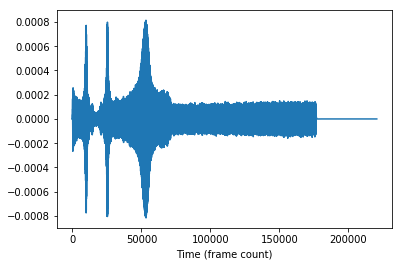

In [4]:
plt.plot(audio)
plt.xlabel('Time (frame count)')

In [5]:
Audio(audio, rate=sampleRate)


In [6]:
print(audio[:10])

[4.4326736725608384e-11, 3.2492453172494606e-10, 1.1504803776318795e-09, 2.6903572702963174e-09, 4.786605778406283e-09, 7.022447956472888e-09, 8.903062287402008e-09, 1.0013401663400145e-08, 1.0124779237230541e-08, 9.243772858269494e-09]
